In [1]:
import sys

sys.path.append("../..")

from functools import partial

In [2]:
%load_ext autoreload
%autoreload 2
from mlstm_kernels.utils.analysis.roofline_analysis.plot_runtime import (
    create_runtime_plot,
)
from mlstm_kernels.utils.analysis.roofline_analysis.plot_config import savefig

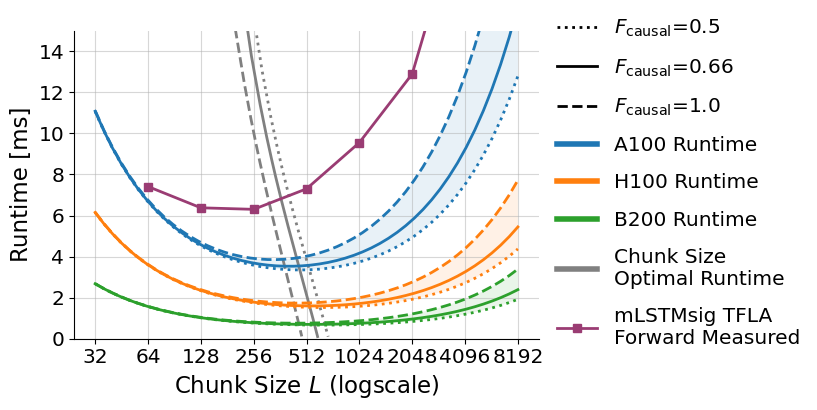

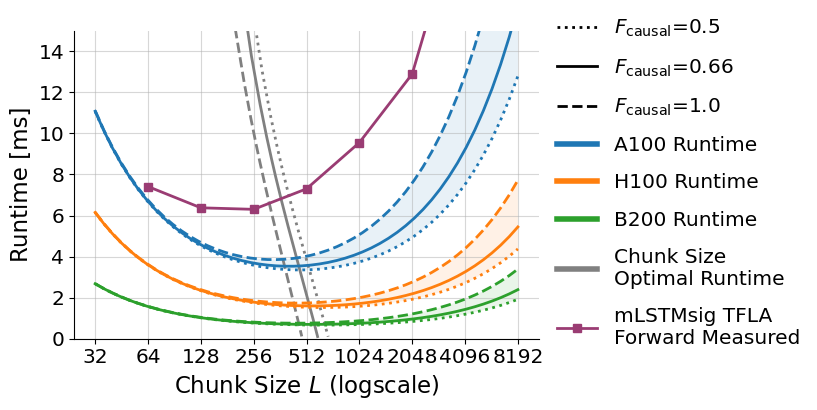

In [3]:
fig = create_runtime_plot()
fig

In [4]:
savefig(fig, "mlstm_runtime_over_chunk_size--poster")

In [ ]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mlstm_kernels.utils.analysis.roofline_analysis.roofline_analysis_mlstm import (
    acc_math_projection,
    acc_mem_projection,
)

In [ ]:
xdata = np.linspace(0, 9, 100)

In [ ]:
plt.plot(
    xdata, acc_math_projection(xdata) / acc_mem_projection(xdata), label="Roofline"
)

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(acc_intensities, y)

In [ ]:
from mlstm_kernels.utils.analysis.roofline_analysis.roofline_analysis_mlstm import (
    Acc_math_v100,
    Acc_mem_v100,
    Acc_math_a100,
    Acc_mem_a100,
    Acc_math_h100,
    Acc_mem_h100,
    Acc_intensity_v100,
    Acc_intensity_a100,
    Acc_intensity_h100,
    Acc_math_b200,
    Acc_mem_b200,
    Acc_intensity_b200,
)
import matplotlib.pyplot as plt

In [ ]:
add_blackwell = True

if add_blackwell:
    years = [0, 3, 5, 8]
    math_points = [Acc_math_v100, Acc_math_a100, Acc_math_h100, Acc_math_b200]
    mem_points = [Acc_mem_v100, Acc_mem_a100, Acc_mem_h100, Acc_mem_b200]
    intensity_points = [
        Acc_intensity_v100,
        Acc_intensity_a100,
        Acc_intensity_h100,
        Acc_intensity_b200,
    ]
else:
    years = [0, 3, 5]
    math_points = [Acc_math_v100, Acc_math_a100, Acc_math_h100]
    mem_points = [Acc_mem_v100, Acc_mem_a100, Acc_mem_h100]
    intensity_points = [Acc_intensity_v100, Acc_intensity_a100, Acc_intensity_h100]

math_coefficients = np.polyfit(years, math_points, 1)
mem_coefficients = np.polyfit(years, mem_points, 1)
intensity_coefficients = np.polyfit(years, intensity_points, 1)

In [ ]:
plt.scatter(mem_points, math_points)
# plt.xscale("log")

In [ ]:
plt.scatter(years, intensity_points)

In [ ]:
math_coefficients, mem_coefficients, intensity_coefficients

In [ ]:
def lin_func(x, coefficients):
    return coefficients[0] * x + coefficients[1]

In [ ]:
xdata = np.linspace(0.5, 8, 10)

In [ ]:
plt.plot(xdata, lin_func(xdata, math_coefficients))
plt.scatter(years, math_points)

In [ ]:
plt.plot(xdata, lin_func(xdata, mem_coefficients))
plt.scatter(years, mem_points)

In [ ]:
plt.plot(xdata, lin_func(xdata, math_coefficients) / lin_func(xdata, mem_coefficients))
plt.scatter(years, intensity_points)
plt.grid()

In [ ]:
[Acc_intensity_v100, Acc_intensity_a100, Acc_intensity_h100]